<a href="https://colab.research.google.com/github/sbooeshaghi/web_log/blob/master/2020_02_20-The_Cost_of_a_Human_Genome/Cost_of_Human_Genome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The cost of a human genome.

Author: **A. Sina Booeshaghi**

Date: **20 February 2020**

Two days ago [Nebula Genomics](https://nebula.org/) (in parternship with [BGI](https://www.bgi.com/us/)) announced 30x Whole-Genome Sequencing for \$299. That cost is **320 thousand** times cheaper than the initial cost of the first *complete* human genome (\$95,000,000) in 2001 ([source 1](https://www.nature.com/articles/35057062), [source 2](https://science.sciencemag.org/content/291/5507/1304#aff-8)).

It is important to note the following about the cost of a human genome:
> The above estimated cost for generating the first human genome sequence by the Human Genome Project (HGP) should not be confused with the total cost of the HGP. The originally projected cost for the U.S.'s contribution to the HGP was \$3 billion; in actuality, the Project ended up taking less time (13 years rather than 15 years) and requiring less funding - \$2.7 billion. But the latter number _represents the total U.S. funding for a wide range of scientific activities under the HGP's umbrella beyond human genome sequencing._

The source of this quote and the data for this notebook can be found at [genome.gov](https://www.genome.gov/about-genomics/fact-sheets/DNA-Sequencing-Costs-Data). **This notebook will explore the cost of the human genome over time and make predictions for the future.** (This notebook takes 8.40 seconds to run on Google Colab.)

In [0]:
import time
now = time.time()

In [0]:
#@title Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

fsize=20
plt.rcParams.update({'font.size': fsize})

%config InlineBackend.figure_format = 'retina'

In [0]:
df = pd.read_excel("https://www.genome.gov/sites/default/files/media/files/2019-10/Sequencing_Cost_Data_Table_Aug2019.xls", sheet_name=None)
df = df["Data Table"]

There are 3 billion base pairs in the human genome. Short read sequencing is typically used to construct a human genome and requires ~30x coverage to reliably call SNPs. This means that on average any one position in the human genome has 30 short sequences that align to it. Let $C$ be the cost per genome. There are $3*10^3$ Mb in the human genome so then the cost per Mb is 
\begin{align}
CPMb = \frac{C}{30\cdot3\cdot10^3}
\end{align}

In [0]:
df["Date"] = pd.to_datetime(df["Date"])

# Lets add the most recent cost of a human genome to our list.

In [0]:
df = df.append({"Date": dt.datetime.today(),  "Cost per Mb":299/(30*3*10**3), "Cost per Genome":299}, ignore_index=True)

In [0]:
df.index = df.Date.values
del df["Date"]

In [7]:
df

,Cost per Mb,Cost per Genome
2001-09-30 00:00:00.000000,5292.392885,9.526307e+07
2002-03-31 00:00:00.000000,3898.635412,7.017544e+07
2002-09-30 00:00:00.000000,3413.801195,6.144842e+07
2003-03-31 00:00:00.000000,2986.204671,5.375168e+07
2003-10-31 00:00:00.000000,2230.975235,4.015755e+07
...,...,...
2018-11-30 00:00:00.000000,0.015463,1.391683e+03
2019-02-28 00:00:00.000000,0.013347,1.201188e+03
2019-05-01 00:00:00.000000,0.006737,6.063166e+02
2019-08-01 00:00:00.000000,0.010468,9.421465e+02


# Analysis

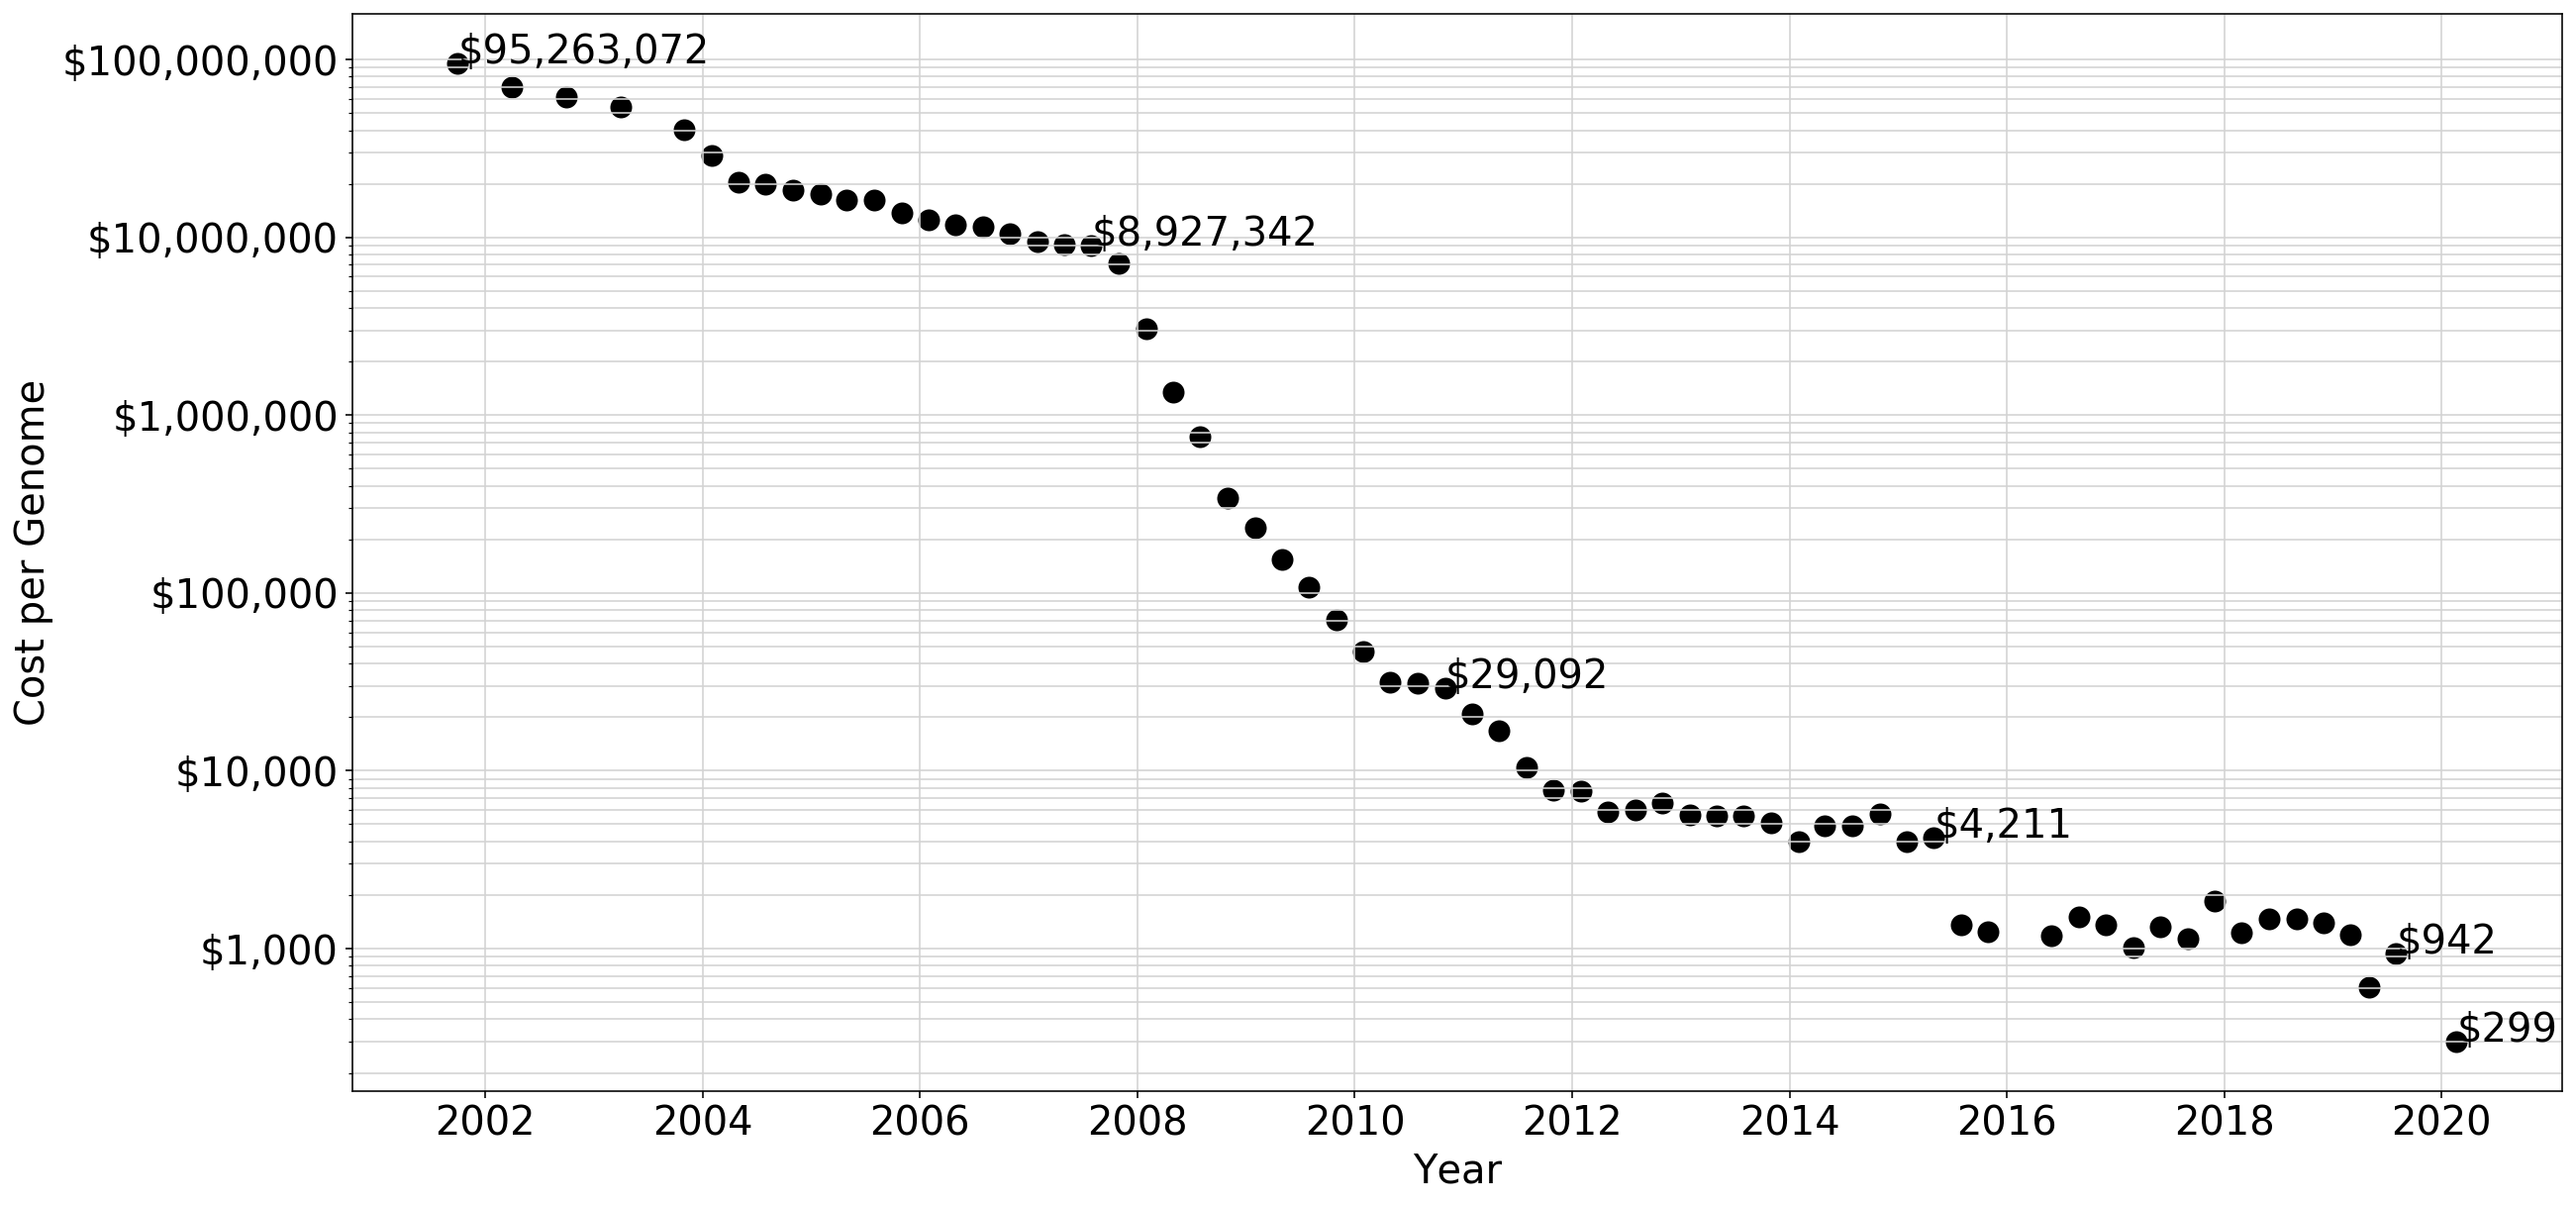

In [8]:
#@title Cost of a human genome over time.
fig, ax = plt.subplots(figsize=(20,10))

x = df.index.values
y = df["Cost per Genome"].values

ax.scatter(x, y, color="k", s=100)

ax.set_xlabel("Year")
ax.set_ylabel("Cost per Genome")

ax.set_yscale("log")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.grid(True, which="both", color="lightgrey")

ax.annotate("${:,.0f}".format(y[0]),(x[0], y[0]))
ax.annotate("${:,.0f}".format(y[19]),(x[19], y[19]))
ax.annotate("${:,.0f}".format(y[32]),(x[32], y[32]))
ax.annotate("${:,.0f}".format(y[50]),(x[50], y[50]))
ax.annotate("${:,.0f}".format(y[66]),(x[66], y[66]))
ax.annotate("${:,.0f}".format(y[-1]),(x[-1], y[-1]))

plt.show()

## What happened in 2008-2010 that caused such a dramatic drop in price?
The emergence of Next Generation Sequencing (NGS) technologies, see this paper for more details: https://www.nature.com/articles/nature07517

Quote from [Wikipedia](https://en.wikipedia.org/wiki/Whole_genome_sequencing)

> In June 2009, Illumina announced that they were launching their own Personal Full Genome Sequencing Service at a depth of 30x for \$48,000 per genome. In August, the founder of Helicos Biosciences, Stephen Quake, stated that using the company's Single Molecule Sequencer he sequenced his own full genome for less than \$50,000. In November, Complete Genomics published a peer-reviewed paper in Science demonstrating its ability to sequence a complete human genome for \$1,700.


# What happened in 2011 that caused another substantial drop in price?
Quote from [Wikipedia](https://en.wikipedia.org/wiki/Whole_genome_sequencing)

> In May 2011, Illumina lowered its Full Genome Sequencing service to \$5,000 per human genome, or \$4,000 if ordering 50 or more. Helicos Biosciences, Pacific Biosciences, Complete Genomics, Illumina, Sequenom, ION Torrent Systems, Halcyon Molecular, NABsys, IBM, and GE Global appear to all be going head to head in the race to commercialize full genome sequencing.

# What happened in 2015 that caused yet another substantial drop in price?

New technologies became commercially available to perform genome sequencing: https://nanoporetech.com/about-us/news/press-release-oxford-nanopore-announces-ps70-million-109-million-fundraising

# What would this trend have looked like if the cost of a human genome scaled with the inverse of Moore's law?

[Moore's law](https://hasler.ece.gatech.edu/Published_papers/Technology_overview/gordon_moore_1965_article.pdf) states that the number of transistors on a CPU will double every two years. The inverse of Moore's law applied to this data says the inverse of this statement: **the cost of the human genome will half every two years.**

In [0]:
# Every two years we would have halfed the price of a genome.
t0 = df.index[0]
t = np.array([t0 + dt.timedelta(days=730*i) for i in range(10)])

In [0]:
c0 = df.iloc[0]["Cost per Genome"]
c = [c0/(2**i) for i in range(0, 10)]

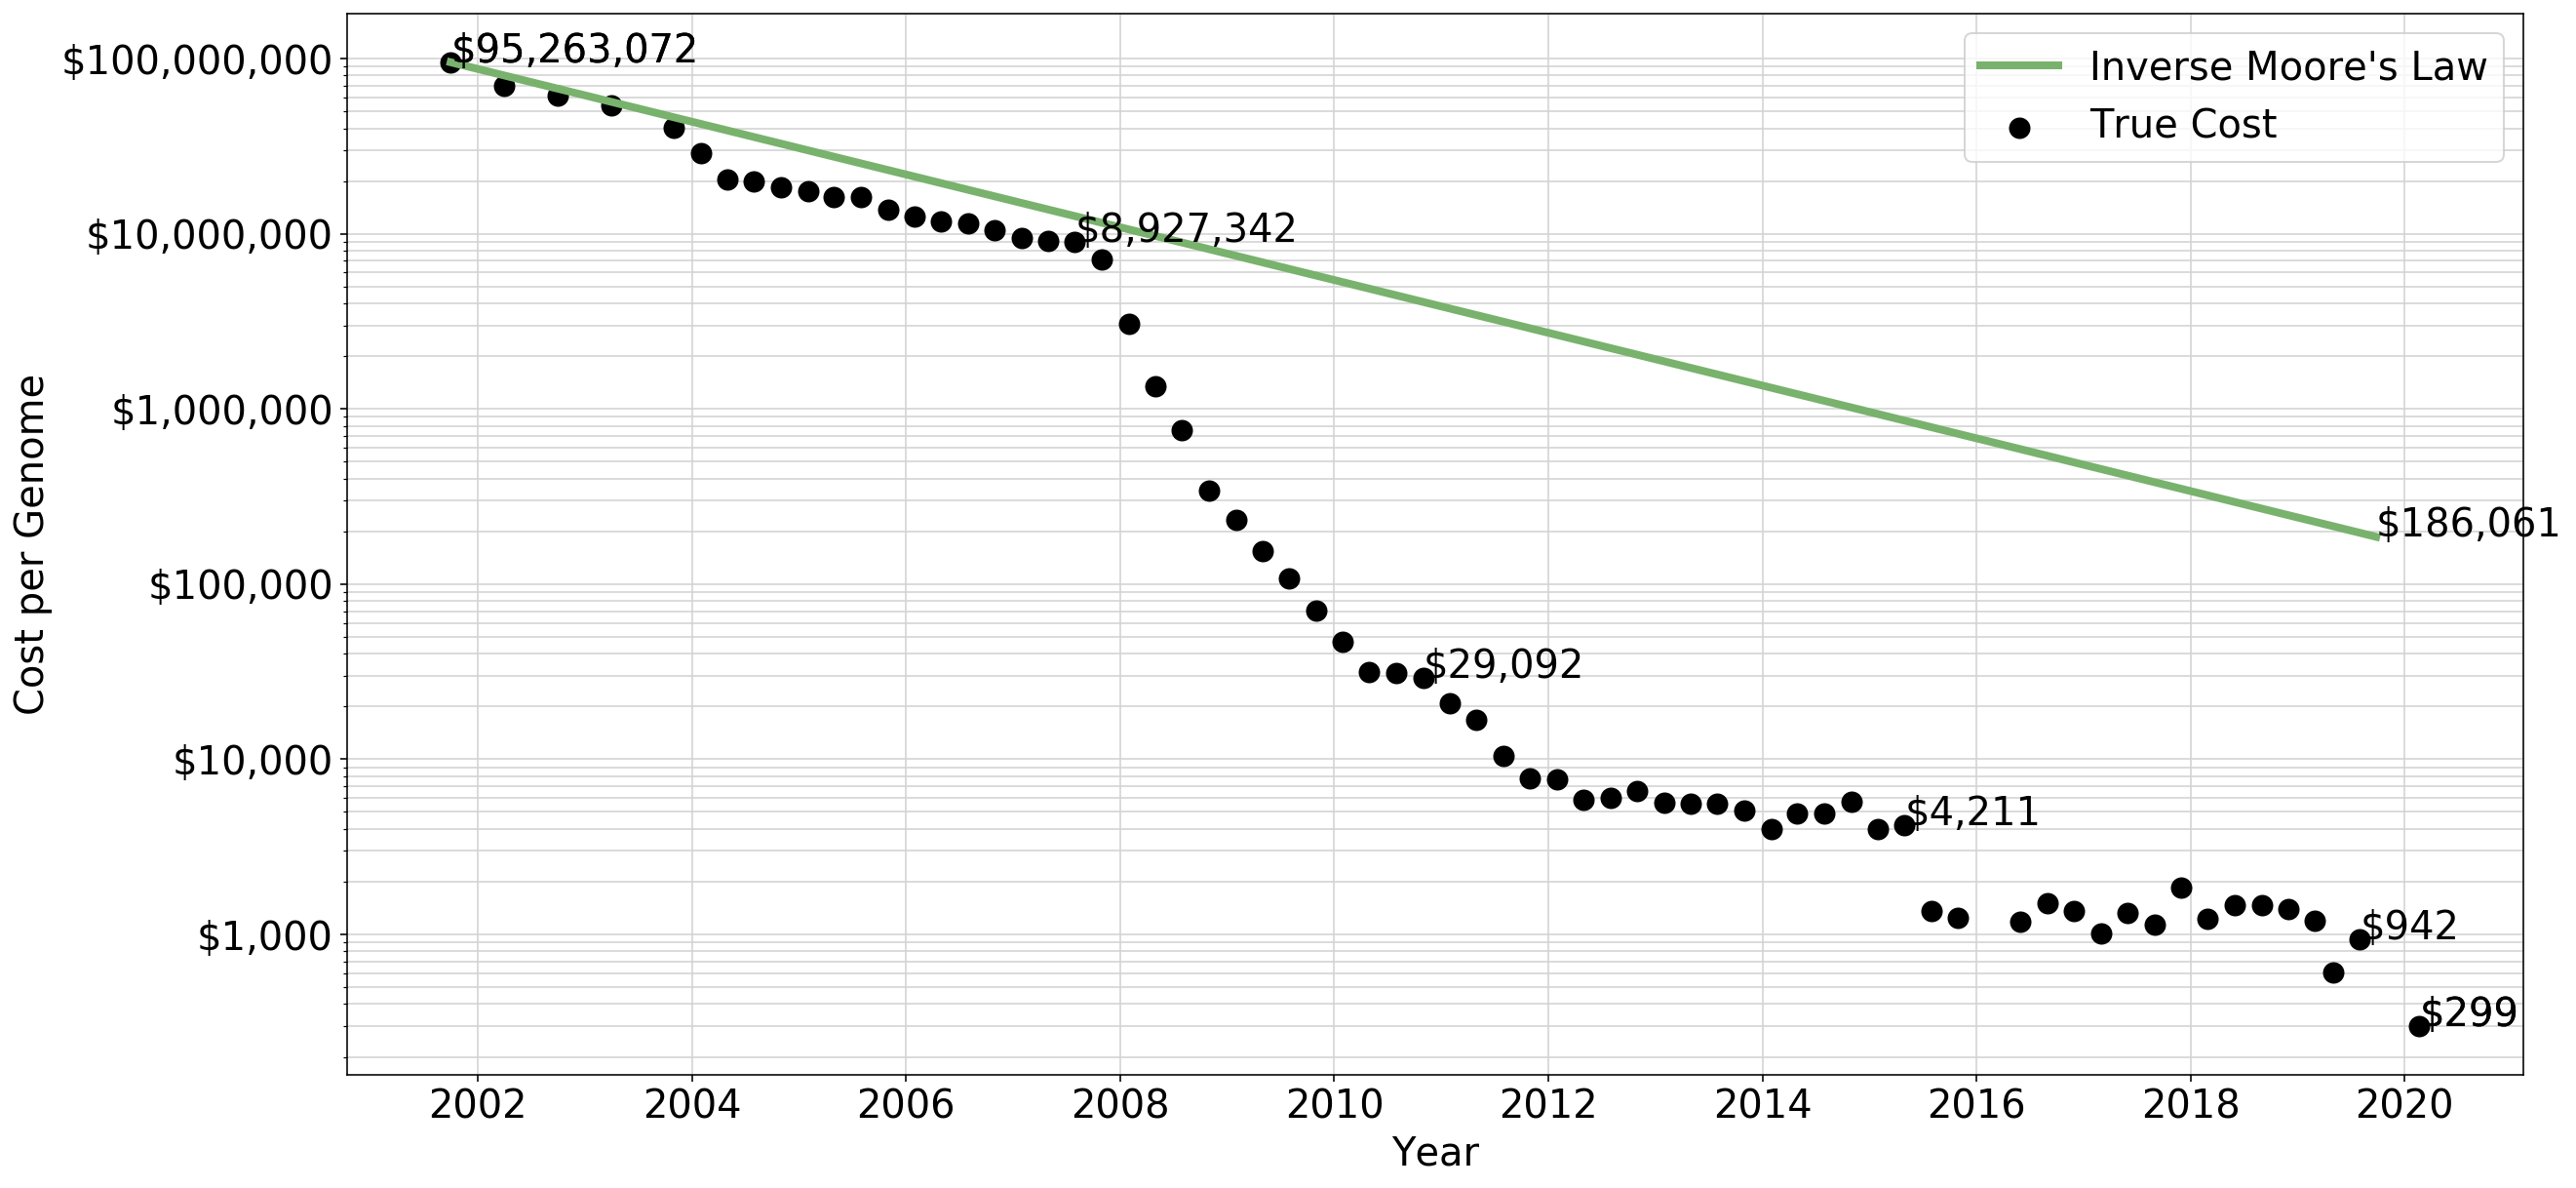

In [11]:
#@title Predicting current cost of a human genome with the inverse of Moore's Law.
fig, ax = plt.subplots(figsize=(20,10))

x = df.index.values
y = df["Cost per Genome"].values

ax.scatter(x, y, color="k", s=100, label="True Cost", zorder=2)

ax.annotate("${:,.0f}".format(y[-1]),(x[-1], y[-1]))

x = t
y = c
ax.plot(x, y, zorder=2, label="Inverse Moore's Law",color="#78b26d" , linewidth=4)

ax.set_xlabel("Year")
ax.set_ylabel("Cost per Genome")

ax.set_yscale("log")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.grid(True, which="both", color="lightgrey")

ax.annotate("${:,.0f}".format(y[0]),(x[0], y[0]))
ax.annotate("${:,.0f}".format(y[-1]),(x[-1], y[-1]))


x = df.index.values
y = df["Cost per Genome"].values

ax.annotate("${:,.0f}".format(y[0]),(x[0], y[0]))
ax.annotate("${:,.0f}".format(y[19]),(x[19], y[19]))
ax.annotate("${:,.0f}".format(y[32]),(x[32], y[32]))
ax.annotate("${:,.0f}".format(y[50]),(x[50], y[50]))
ax.annotate("${:,.0f}".format(y[66]),(x[66], y[66]))
ax.annotate("${:,.0f}".format(y[-1]),(x[-1], y[-1]))

ax.legend()
plt.show()

# Without substantial technological advances, a human genome would have cost $186,061 today.
Thank you science.

# Does the $299 genome match prior forecasts?

We will take the cost of a Genome from mid 2007 onward and will perform machine learning in the cloud (aka curve fitting with an exponential function in Google colab).

Note that the cost decays exponentially on a logorithmic scale. That is quite the decay, so we fit an exponential function to the `log10` values.

In [0]:
obs = df[df.index>=dt.datetime(year=2007, month=6, day=1)]

In [0]:
min_date = min(obs.index)
max_date = max(obs.index)

### First lets extract the convex hull.

In [0]:
from scipy.spatial import ConvexHull

In [0]:
x = np.linspace(start=0, stop=pd.date_range(start=min_date, end=max_date, freq=dt.timedelta(365/12), closed="left").shape[0], num=obs.shape[0])
y = obs["Cost per Genome"].values
h = ConvexHull(np.vstack([x, y]).T)

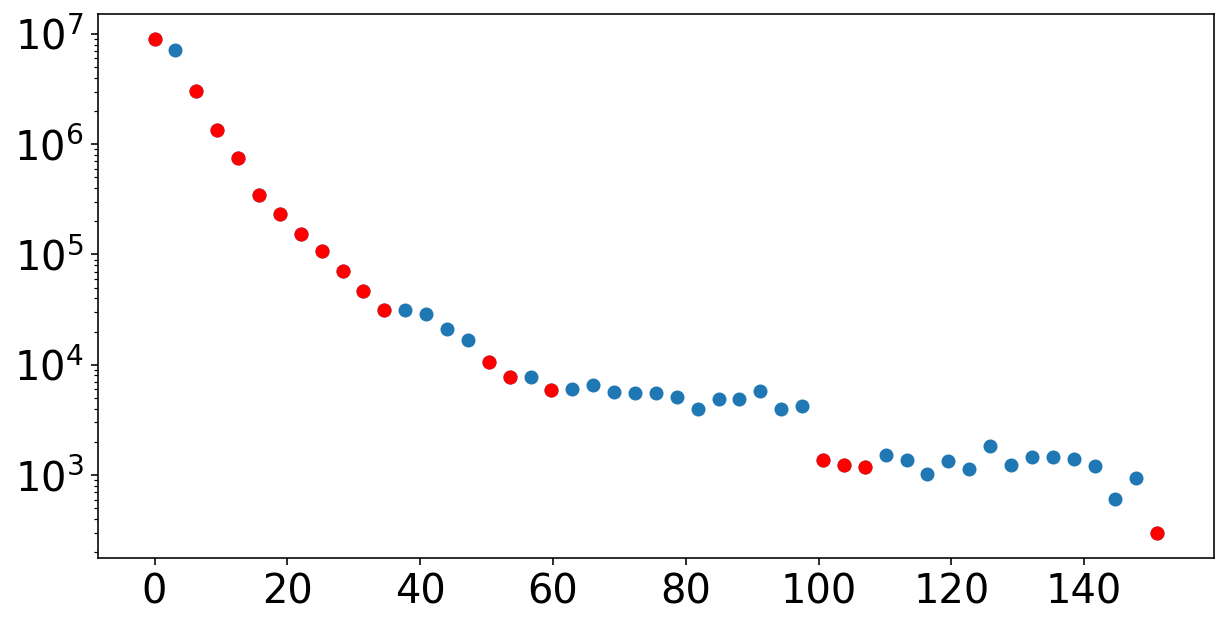

In [16]:
#@title Red indicates the hull.
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(h.points[h.vertices,0], h.points[h.vertices,1], 'ro')
ax.scatter(h.points[:,0], h.points[:,1])
ax.set_yscale("log")
plt.show()

### Now we fit a trendline to the convex hull

In [0]:
def func(x, a, b, c):
    return a*10**(-b * x) + c

x = h.points[h.vertices,0]
y = np.log10(h.points[h.vertices,1])

popt, pcov = curve_fit(func, x, y)

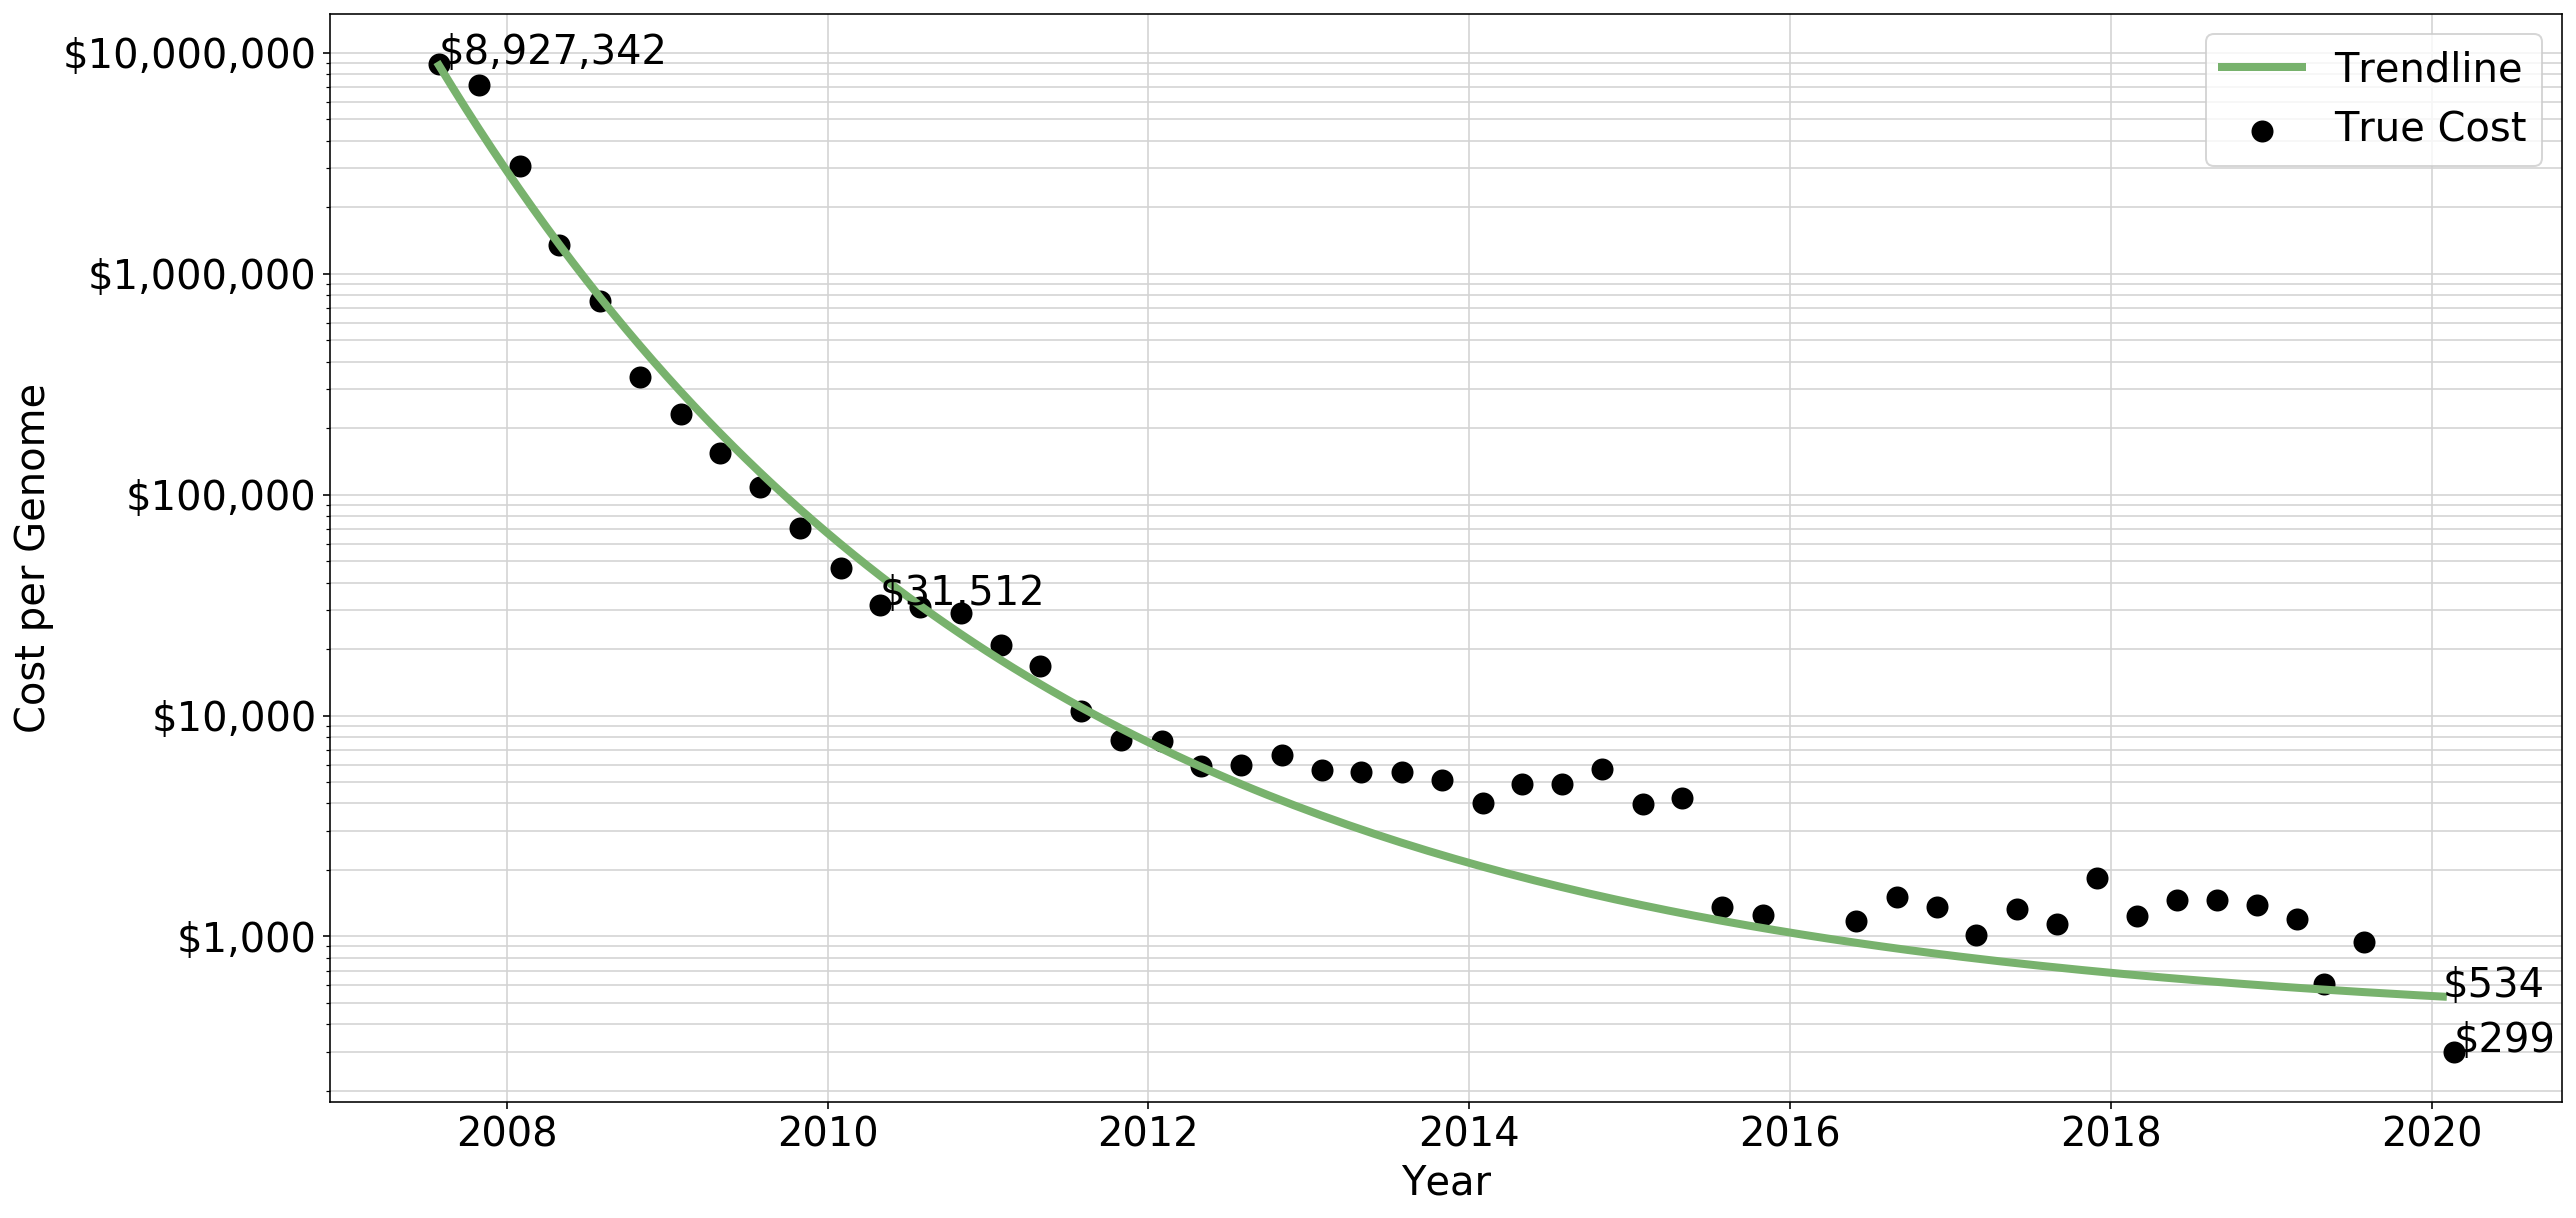

In [18]:
#@title Predicting current cost of a human genome.
fig, ax = plt.subplots(figsize=(20,10))

## Truth
t = obs.index.values
y = obs["Cost per Genome"].values

ax.scatter(t, y, color="k", s=100, label="True Cost", zorder=2)

ax.annotate("${:,.0f}".format(y[0]),(t[0], y[0]))
ax.annotate("${:,.0f}".format(y[11]),(t[11], y[11]))
ax.annotate("${:,.0f}".format(y[-1]),(t[-1], y[-1]))

## Trend
t = pd.date_range(start=min_date, end=max_date, freq=dt.timedelta(365/12), closed="left")
x = np.linspace(0, t.shape[0], num=t.shape[0])
y = 10**(func(x, *popt))
ax.plot(t, y, linewidth=4, label="Trendline", color="#78b26d")

ax.annotate("${:,.0f}".format(y[-1]),(t[-1], y[-1]))

## Customize
ax.set_xlabel("Year")
ax.set_ylabel("Cost per Genome")

ax.set_yscale("log")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.grid(True, which="both", color="lightgrey")

ax.legend()
plt.show()

# The $299 Genome is 1.8x cheaper than expected.
Was Nebula Genomics pricing a surprise? Are they losing money on this deal?

# If prior forecasts hold, where will the price of a human genome be in the next 20 years?

In [0]:
def func(x, a, b, c):
    return a*10**(-b * x) + c

x = h.points[h.vertices,0]
y = np.log10(h.points[h.vertices,1])

popt, pcov = curve_fit(func, x, y)

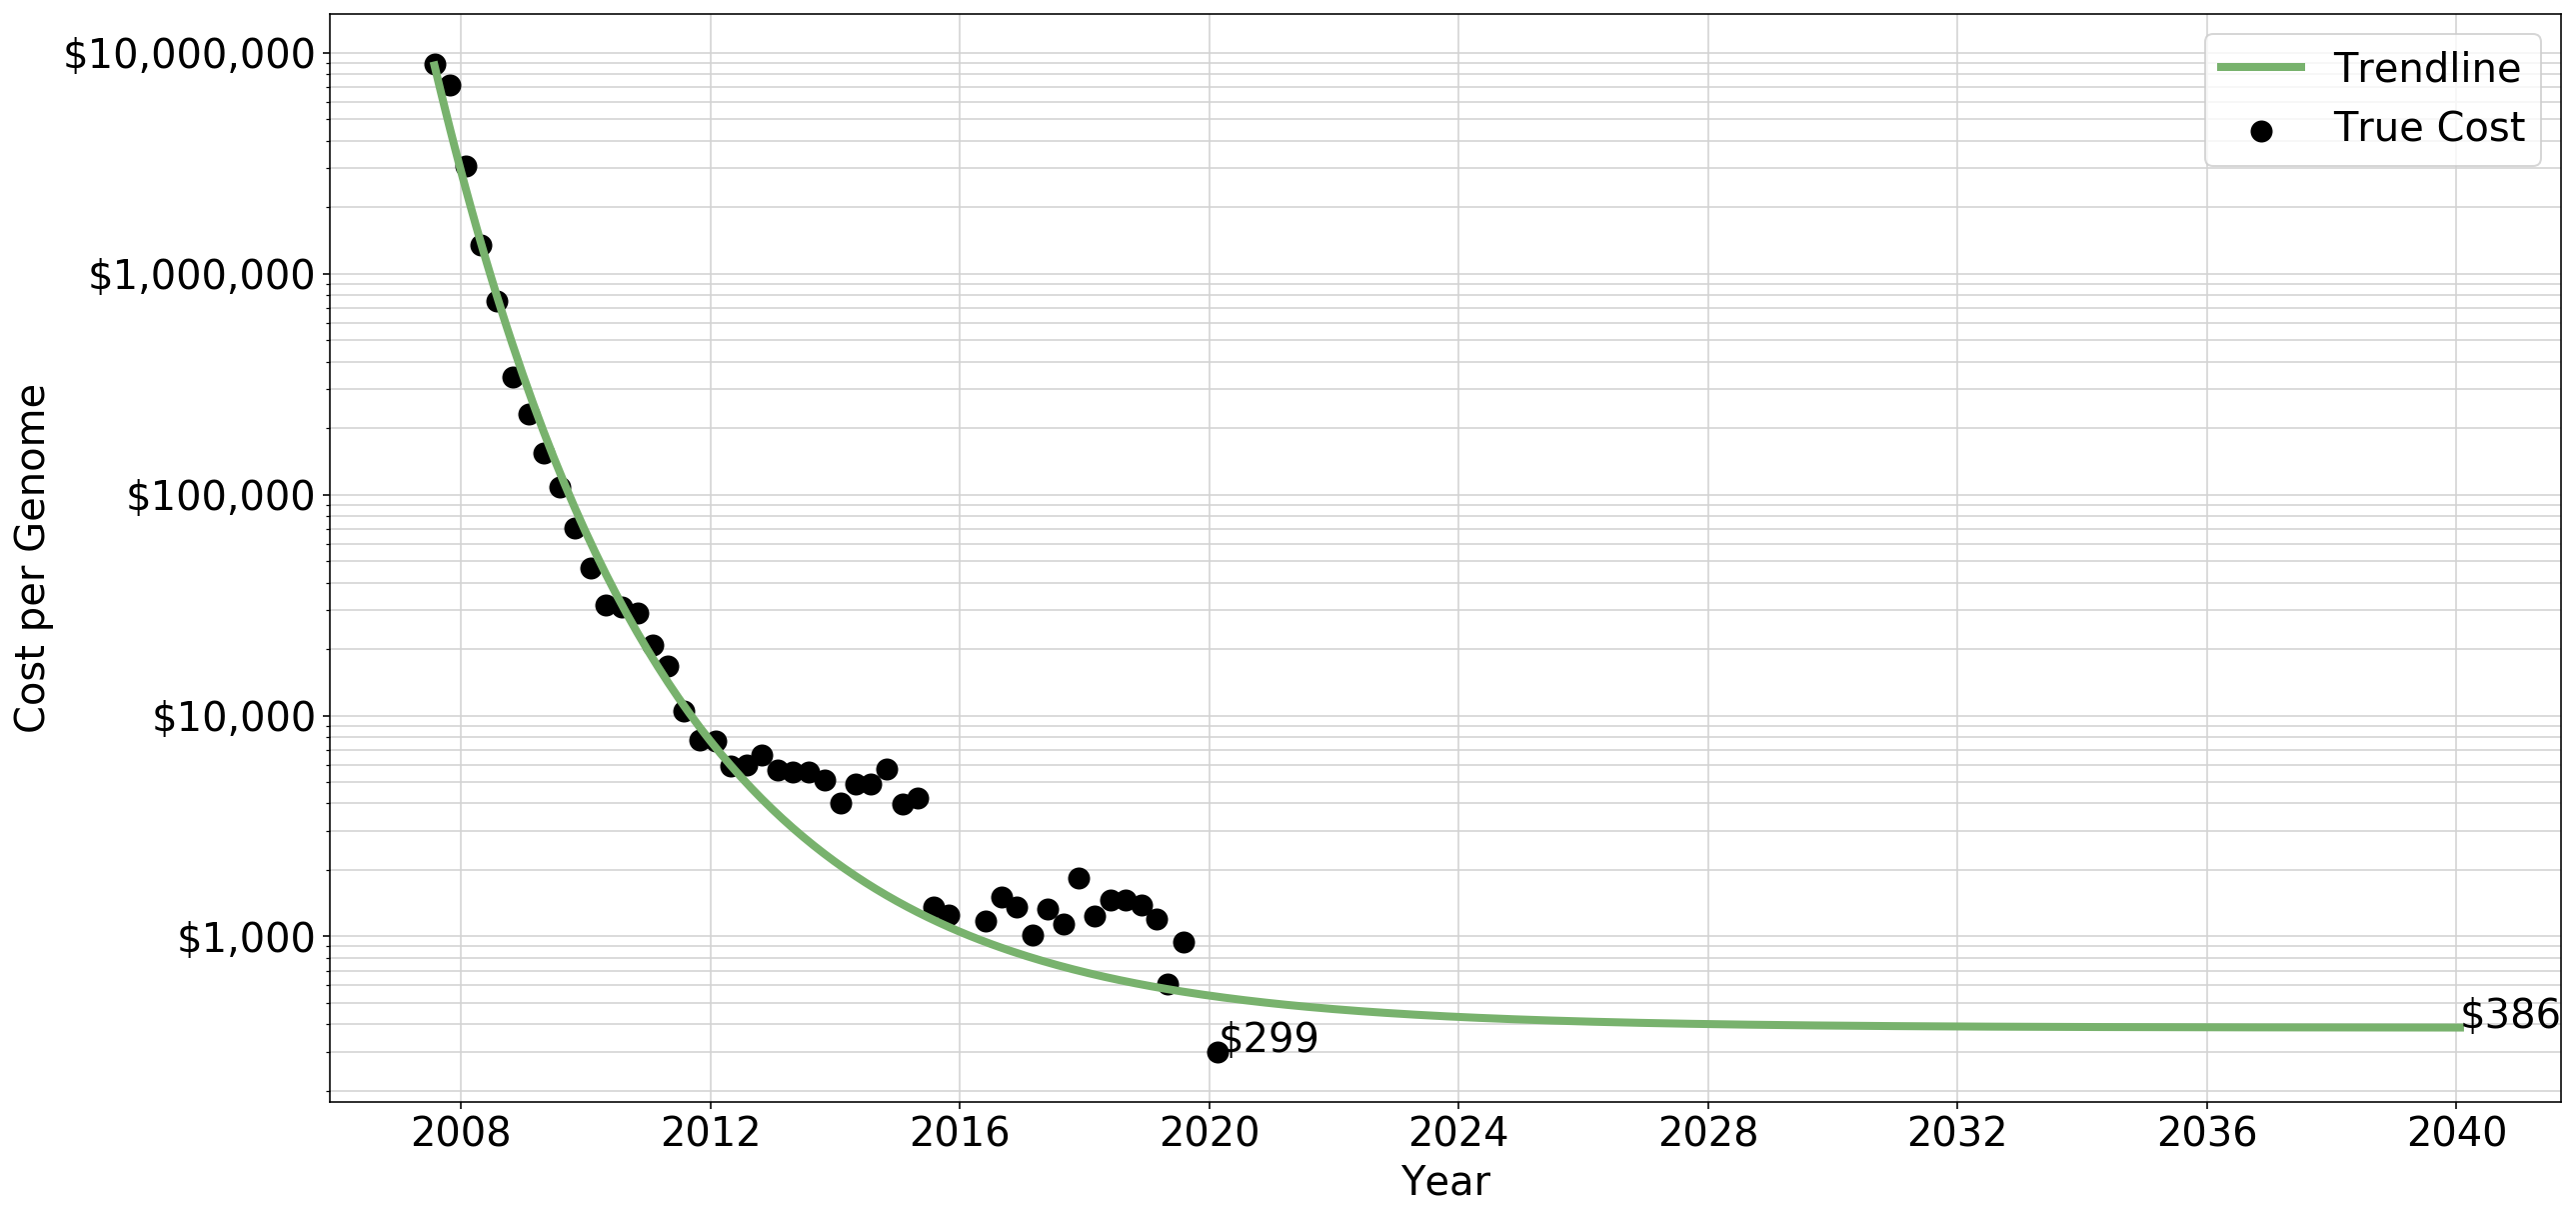

In [20]:
#@title Predicting the price of a human genome in 20 years.
fig, ax = plt.subplots(figsize=(20,10))

## Truth
t = obs.index.values
y = obs["Cost per Genome"].values

ax.scatter(t, y, color="k", s=100, label="True Cost", zorder=2)
ax.annotate("${:,.0f}".format(y[-1]),(t[-1], y[-1]))

## Trend
t = pd.date_range(start=min_date, end=max_date+dt.timedelta(days=365*20), freq=dt.timedelta(365/12), closed="left")

x = np.linspace(start=0, stop=t.shape[0], num=t.shape[0])
y = 10**(func(x, *popt))
ax.plot(t, y, linewidth=4, label="Trendline", color="#78b26d")
ax.annotate("${:,.0f}".format(y[-1]),(t[-1], y[-1]))

## Customize
ax.set_xlabel("Year")
ax.set_ylabel("Cost per Genome")

ax.set_yscale("log")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.grid(True, which="both", color="lightgrey")



ax.legend()
plt.show()

## By 2040 the expected price of the human genome is $386, which is \$87 more than the current price.

To conclude, the \$299 human genome is quite inexpensive relative to the initial price of the first *complete* genome and it appears to be slightly lower than what one would predict. This could indicate that either Nebula Genomics has improved sequencing technology, has increased their throughput at a fixed cost, is losing money, or just got a great deal with the sequencing company BGI.

In [21]:
print("This notebook took {:.2f} seconds to run.".format(time.time()-now))

This notebook took 8.40 seconds to run.
